Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)

Import Data

In [47]:
train = pd.read_csv('Data/fraudTrain.csv')
test = pd.read_csv('Data/fraudTest.csv')

Data Preprocessing

In [48]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [50]:
# Convert object columns to datetimes
train["transaction_time"] = pd.to_datetime(train["trans_date_trans_time"])
train["date_of_birth"] = pd.to_datetime(train["dob"])

# Convert int columns to category
train.cc_num = train.cc_num.astype('category')
train.is_fraud = train.is_fraud.astype('category')
train.gender = train.gender.astype('category')
train.merchant = train.merchant.astype('category')
train.category = train.category.astype('category')

# Drop unneccessary columns
train.drop(["Unnamed: 0", "trans_date_trans_time"], axis=1, inplace=True)

# Drop duplicates
train.drop_duplicates(inplace=True)

Exploratory Data Analysis

In [51]:
# Lets check the response variable 
train.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

Clearly class imbalance problem which is expected from transaction dataset

In [53]:
# Lets take a look at the gender count in the dataset
train.gender.value_counts()

F    709863
M    586812
Name: gender, dtype: int64

In [55]:
train.category.value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

## Question 1: Are there any specific category which sees the most fraudulent activity?

In [80]:
# Lets take a look at the amounts of transaction using fradulent activity at various category
category_group = train.groupby(by=[pd.Grouper(key="transaction_time", freq="1W"), 'is_fraud','category']).agg({"amt":'mean',"trans_num":"count"}).reset_index()
category_group.head()

,transaction_time,is_fraud,category,amt,trans_num
0,2019-01-06,0,entertainment,63.37,681
1,2019-01-06,0,food_dining,49.67,695
2,2019-01-06,0,gas_transport,63.99,987
3,2019-01-06,0,grocery_net,54.41,329
4,2019-01-06,0,grocery_pos,111.78,930


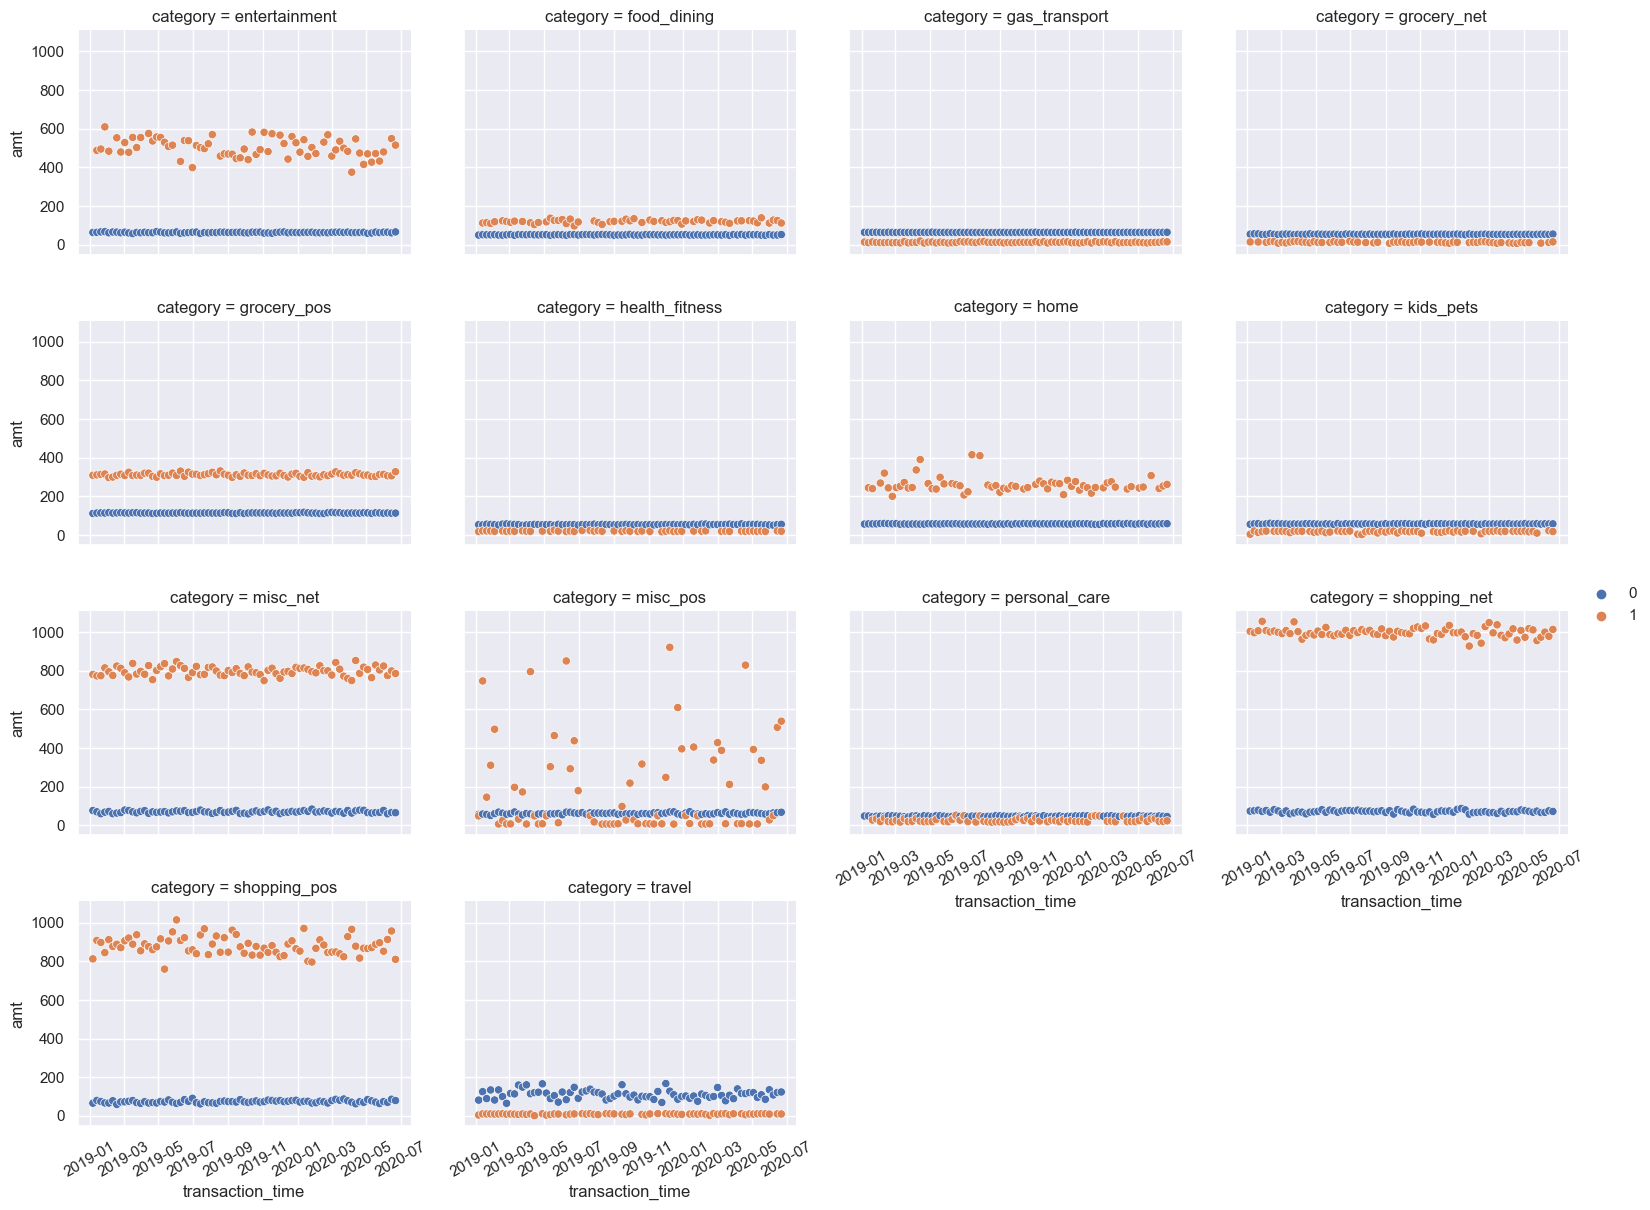

In [81]:
g = sns.FacetGrid(category_group, col="category",col_wrap = 4, margin_titles=True, height=3, aspect= 1.33)
g.map_dataframe(sns.scatterplot, x = "transaction_time", y = "amt", hue = "is_fraud")
g.set_xticklabels(rotation=30)
g.add_legend()

There is a clear spike in the average weekly amount transaction as fraud in the following categories in the dataset
- Shopping_net
- Shopping_pos
- Entertainment
- Misc_net
- Home

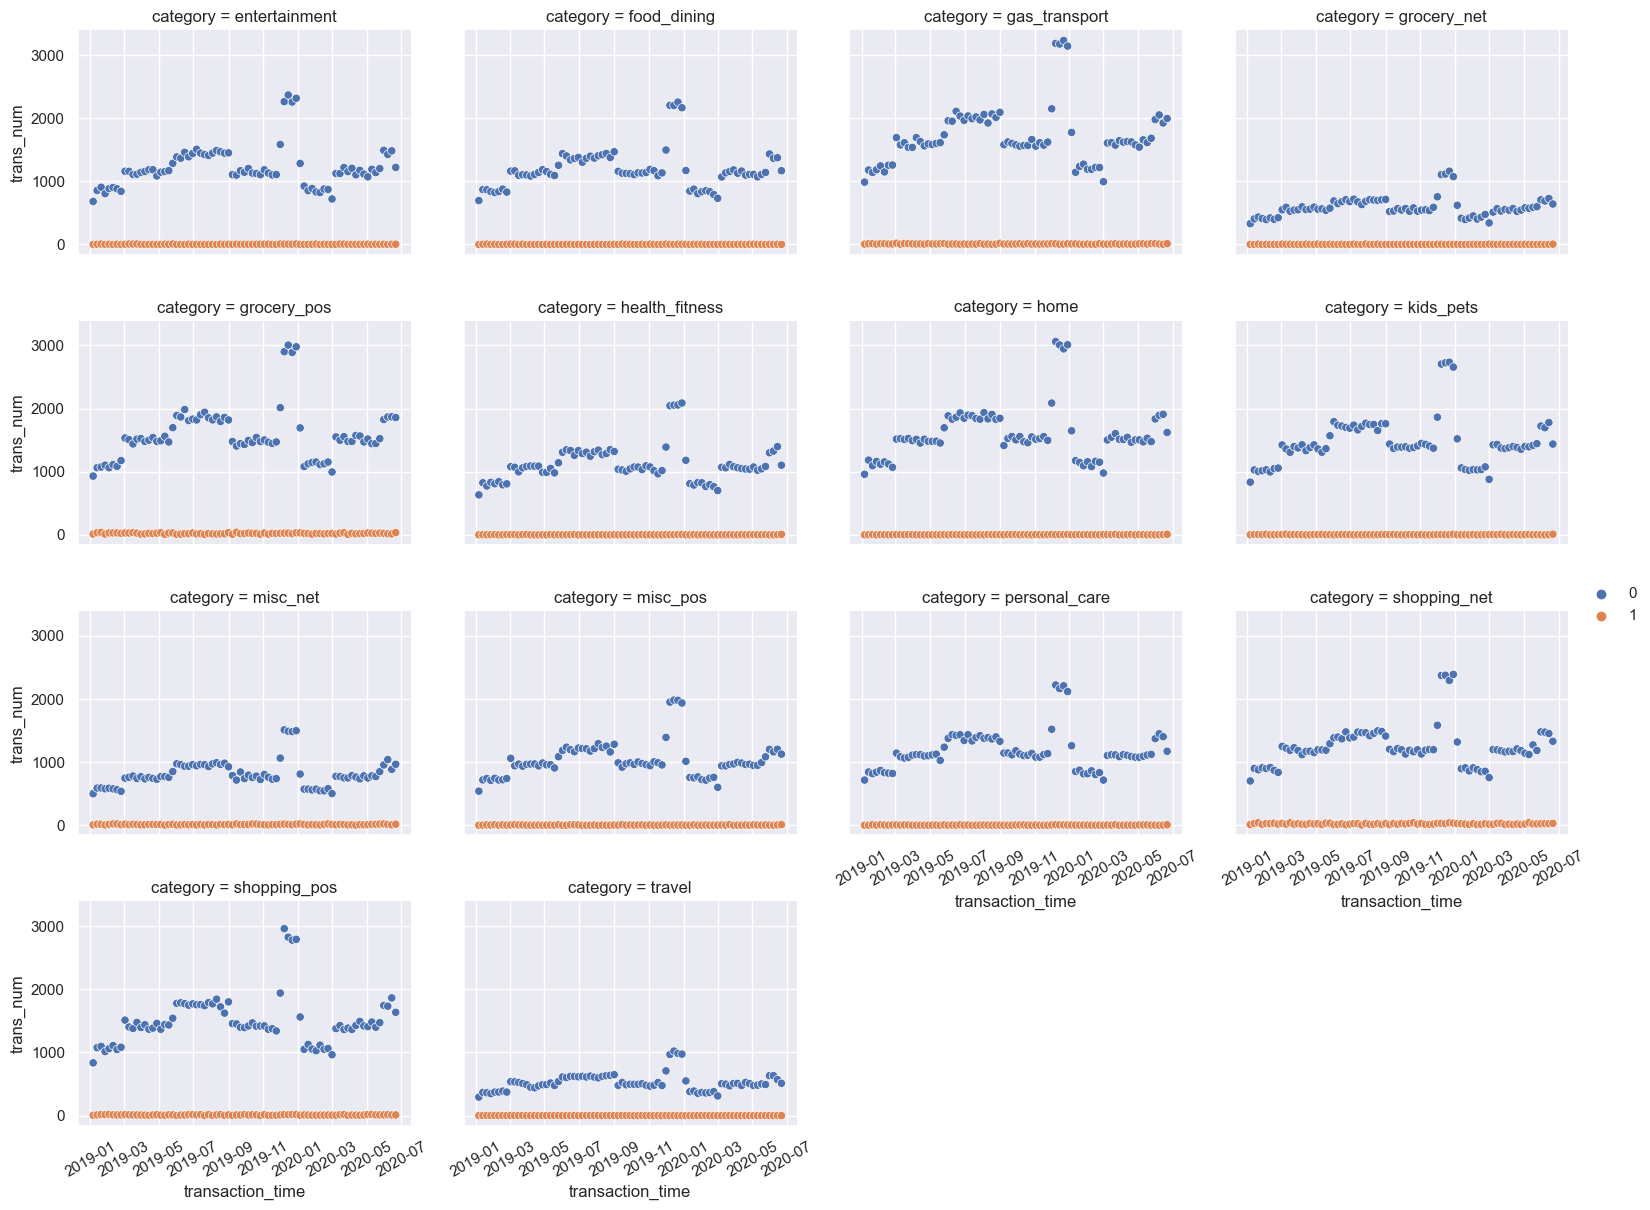

In [74]:
g = sns.FacetGrid(category_group, col="category",col_wrap = 4, margin_titles=True, height=3, aspect= 1.33)
g.map_dataframe(sns.scatterplot, x = "transaction_time", y = "trans_num", hue = "is_fraud")
g.set_xticklabels(rotation=30)
g.add_legend()

The number of fraudulent transactions on a weekly basis is constant and extremely low which is expected

## Question 2: Does gender impacts fraud?

In [83]:
gender_group = train.groupby(by=[pd.Grouper(key="transaction_time", freq="1W"), 'is_fraud','gender']).agg({"amt":'mean',"trans_num":"count"}).reset_index()
gender_group.head()

,transaction_time,is_fraud,gender,amt,trans_num
0,2019-01-06,0,F,64.79,5304
1,2019-01-06,0,M,67.00,4329
2,2019-01-06,1,F,562.84,24
3,2019-01-06,1,M,533.90,23
4,2019-01-13,0,F,69.81,6458


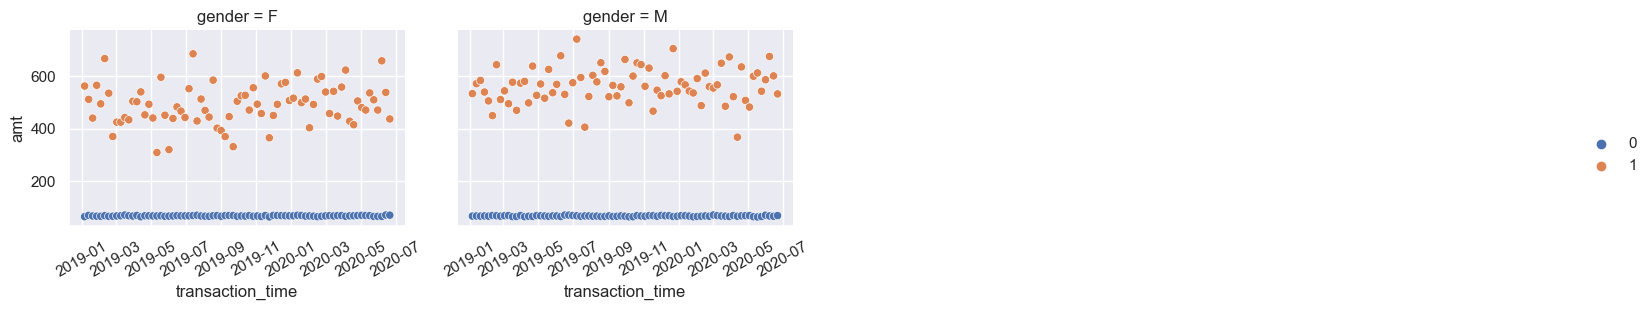

In [84]:
g = sns.FacetGrid(category_group, col="gender",col_wrap = 4, margin_titles=True, height=3, aspect= 1.33)
g.map_dataframe(sns.scatterplot, x = "transaction_time", y = "amt", hue = "is_fraud")
g.set_xticklabels(rotation=30)
g.add_legend()

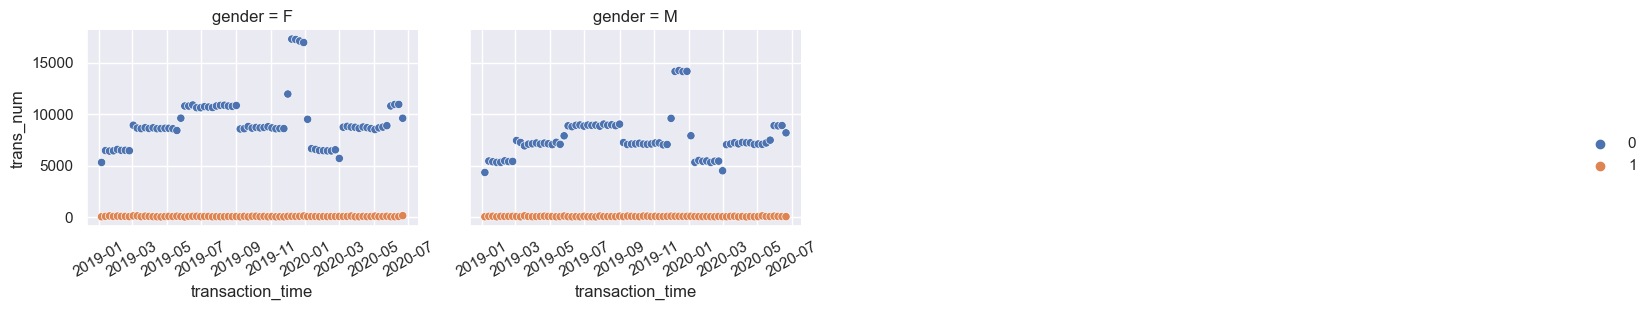

In [85]:
g = sns.FacetGrid(category_group, col="gender",col_wrap = 4, margin_titles=True, height=3, aspect= 1.33)
g.map_dataframe(sns.scatterplot, x = "transaction_time", y = "trans_num", hue = "is_fraud")
g.set_xticklabels(rotation=30)
g.add_legend()